In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_classes = 2


my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg'))
my_new_model.add(Dense(16, activation='relu'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

my_new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,620,530 (90.11 MB)

 Trainable params: 32,818 (128.20 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        './train',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        './val',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
my_new_model.fit(
        train_generator,
        epochs = 5,
        steps_per_epoch=50,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.7756 - loss: 0.5660 - val_accuracy: 0.9167 - val_loss: 0.3279
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9868 - loss: 0.2139 - val_accuracy: 0.8333 - val_loss: 0.2567
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.9868 - loss: 0.1291 - val_accuracy: 1.0000 - val_loss: 0.1960
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.9872 - loss: 0.0877 - val_accuracy: 0.9167 - val_loss: 0.1349
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 1.0000 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.1230


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


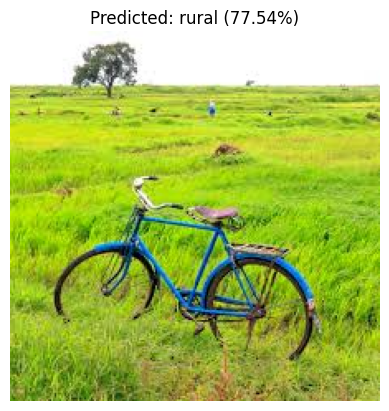

In [11]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the best model
model = my_new_model

VALID_DIR = './train'

# Get class labels
class_names = list(train_generator.class_indices.keys())

# Function to display and predict a random image from validation set
def predict_random_image():
    # Select a random class
    random_class = random.choice(os.listdir(VALID_DIR))
    
    # Select a random image from that class
    class_dir = os.path.join(VALID_DIR, random_class)
    random_image_file = random.choice(os.listdir(class_dir))
    
    # Load and preprocess the image
    img_path = os.path.join(class_dir, random_image_file)
    img = image.load_img(img_path, target_size=(image_size, image_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Display the image with prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

# Run the function
predict_random_image()
